# Quantitative exploratory data analysis

### Computing means

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset('iris')

In [4]:
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

In [6]:
mean_length_vers = np.mean(versicolor_petal_length)
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Computing percentiles

In [7]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing percentiles to ECDF

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
x_vers, y_vers = ecdf(versicolor_petal_length)

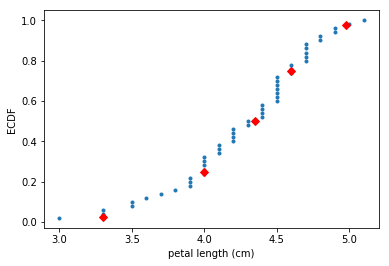

In [11]:
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

### Box-and-whisker plot

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


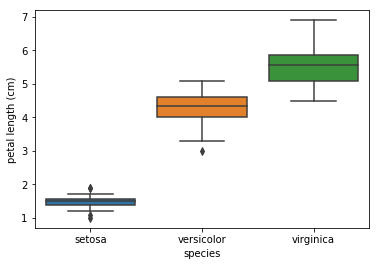

In [15]:
sns.boxplot('species', 'petal_length', data=iris)
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

### Computing the variance

In [17]:
versicolor_petal_length_np = versicolor_petal_length.values

In [19]:
differences = versicolor_petal_length_np - np.mean(versicolor_petal_length_np)

In [20]:
diff_sq = differences**2

In [21]:
variance_explicit = np.mean(diff_sq)

In [24]:
variance_np = np.var(versicolor_petal_length_np)

In [25]:
print(variance_explicit,variance_np)

0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

In [27]:
variance = np.var(versicolor_petal_length_np)

In [28]:
np.sqrt(variance)

0.4651881339845203

In [29]:
np.std(versicolor_petal_length_np)

0.4651881339845203

### Scatter plots

In [30]:
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width

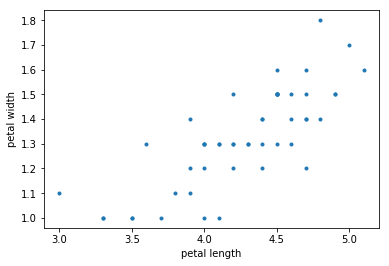

In [32]:
plt.plot(versicolor_petal_length,
         versicolor_petal_width,
         marker='.',
         linestyle='none'
        )
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

### Computing the covariance

In [33]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
covariance_matrix

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [34]:
petal_cov = covariance_matrix[0,1]
petal_cov

0.07310204081632653

### Computing the Pearson correlation coefficient

In [35]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)
r

0.7866680885228169